# Bollinger Bands and  Keltner Channel
> By Srishti Singh

In [1]:
# importing libraries
import pandas as pd
import datetime
import yfinance as yfin
import matplotlib.pyplot as plt
import statistics as stats
from pandas_datareader import data as pdr
import numpy as np
yfin.pdr_override()

In [2]:
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(365)
start_date

datetime.datetime(2022, 11, 1, 5, 14, 4, 846037)

In [3]:
def get_asset(ticker):
  asset = pdr.get_data_yahoo(ticker + '.NS', start = start_date, end = end_date)
  asset.reset_index(inplace = True)
  return asset

In [4]:
LandT = get_asset('LT')
LandT

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-01,2032.000000,2056.000000,1990.050049,2024.449951,2019.894897,4464211
1,2022-11-02,2036.500000,2042.000000,2000.000000,2013.300049,2008.770142,1889651
2,2022-11-03,2006.000000,2022.500000,1993.000000,2008.699951,2004.180298,1052241
3,2022-11-04,2010.000000,2029.349976,2004.750000,2015.099976,2010.565918,2312753
4,2022-11-07,2021.400024,2032.000000,1993.000000,2017.650024,2013.110229,1395070
...,...,...,...,...,...,...,...
243,2023-10-25,2959.000000,2965.500000,2910.300049,2916.100098,2916.100098,2108353
244,2023-10-26,2906.000000,2916.149902,2857.050049,2864.600098,2864.600098,3286109
245,2023-10-27,2864.649902,2910.550049,2857.649902,2901.899902,2901.899902,2399538
246,2023-10-30,2899.199951,2932.000000,2856.149902,2926.350098,2926.350098,1693052


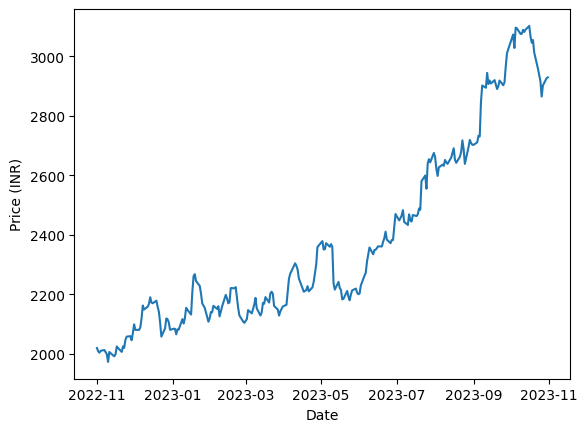

In [5]:
plt.plot(LandT['Date'], LandT['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.show()

In [6]:
# start of formation of bollinger bands
# tp = typcal price
# here we take number of days in smoothing period = 20
tp = (LandT['High'] + LandT['Low'] + LandT['Adj Close'])/3
LandT['TP'] = tp
LandT

,Date,Open,High,Low,Close,Adj Close,Volume,TP
0,2022-11-01,2032.000000,2056.000000,1990.050049,2024.449951,2019.894897,4464211,2021.981649
1,2022-11-02,2036.500000,2042.000000,2000.000000,2013.300049,2008.770142,1889651,2016.923381
2,2022-11-03,2006.000000,2022.500000,1993.000000,2008.699951,2004.180298,1052241,2006.560099
3,2022-11-04,2010.000000,2029.349976,2004.750000,2015.099976,2010.565918,2312753,2014.888631
4,2022-11-07,2021.400024,2032.000000,1993.000000,2017.650024,2013.110229,1395070,2012.703410
...,...,...,...,...,...,...,...,...
243,2023-10-25,2959.000000,2965.500000,2910.300049,2916.100098,2916.100098,2108353,2930.633382
244,2023-10-26,2906.000000,2916.149902,2857.050049,2864.600098,2864.600098,3286109,2879.266683
245,2023-10-27,2864.649902,2910.550049,2857.649902,2901.899902,2901.899902,2399538,2890.033285
246,2023-10-30,2899.199951,2932.000000,2856.149902,2926.350098,2926.350098,1693052,2904.833333


In [7]:
# start of formating of bollinger bands
bolm = LandT['TP'].rolling(window = 20).mean()
LandT['BOLM'] = bolm
LandT

,Date,Open,High,Low,Close,Adj Close,Volume,TP,BOLM
0,2022-11-01,2032.000000,2056.000000,1990.050049,2024.449951,2019.894897,4464211,2021.981649,NaN
1,2022-11-02,2036.500000,2042.000000,2000.000000,2013.300049,2008.770142,1889651,2016.923381,NaN
2,2022-11-03,2006.000000,2022.500000,1993.000000,2008.699951,2004.180298,1052241,2006.560099,NaN
3,2022-11-04,2010.000000,2029.349976,2004.750000,2015.099976,2010.565918,2312753,2014.888631,NaN
4,2022-11-07,2021.400024,2032.000000,1993.000000,2017.650024,2013.110229,1395070,2012.703410,NaN
...,...,...,...,...,...,...,...,...,...
243,2023-10-25,2959.000000,2965.500000,2910.300049,2916.100098,2916.100098,2108353,2930.633382,3039.119995
244,2023-10-26,2906.000000,2916.149902,2857.050049,2864.600098,2864.600098,3286109,2879.266683,3036.974162
245,2023-10-27,2864.649902,2910.550049,2857.649902,2901.899902,2901.899902,2399538,2890.033285,3033.615828
246,2023-10-30,2899.199951,2932.000000,2856.149902,2926.350098,2926.350098,1693052,2904.833333,3028.211662


In [8]:
stddev = LandT['TP'].rolling(window = 20).std()
LandT['Stddev'] = stddev
LandT

,Date,Open,High,Low,Close,Adj Close,Volume,TP,BOLM,Stddev
0,2022-11-01,2032.000000,2056.000000,1990.050049,2024.449951,2019.894897,4464211,2021.981649,NaN,NaN
1,2022-11-02,2036.500000,2042.000000,2000.000000,2013.300049,2008.770142,1889651,2016.923381,NaN,NaN
2,2022-11-03,2006.000000,2022.500000,1993.000000,2008.699951,2004.180298,1052241,2006.560099,NaN,NaN
3,2022-11-04,2010.000000,2029.349976,2004.750000,2015.099976,2010.565918,2312753,2014.888631,NaN,NaN
4,2022-11-07,2021.400024,2032.000000,1993.000000,2017.650024,2013.110229,1395070,2012.703410,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2023-10-25,2959.000000,2965.500000,2910.300049,2916.100098,2916.100098,2108353,2930.633382,3039.119995,55.483459
244,2023-10-26,2906.000000,2916.149902,2857.050049,2864.600098,2864.600098,3286109,2879.266683,3036.974162,60.817536
245,2023-10-27,2864.649902,2910.550049,2857.649902,2901.899902,2901.899902,2399538,2890.033285,3033.615828,66.995212
246,2023-10-30,2899.199951,2932.000000,2856.149902,2926.350098,2926.350098,1693052,2904.833333,3028.211662,72.855728


In [9]:
bolu = bolm + 2 * stddev
bold = bolm - 2 * stddev
LandT['BOLU'] = bolu
LandT['BOLD'] = bold
LandT

,Date,Open,High,Low,Close,Adj Close,Volume,TP,BOLM,Stddev,BOLU,BOLD
0,2022-11-01,2032.000000,2056.000000,1990.050049,2024.449951,2019.894897,4464211,2021.981649,NaN,NaN,NaN,NaN
1,2022-11-02,2036.500000,2042.000000,2000.000000,2013.300049,2008.770142,1889651,2016.923381,NaN,NaN,NaN,NaN
2,2022-11-03,2006.000000,2022.500000,1993.000000,2008.699951,2004.180298,1052241,2006.560099,NaN,NaN,NaN,NaN
3,2022-11-04,2010.000000,2029.349976,2004.750000,2015.099976,2010.565918,2312753,2014.888631,NaN,NaN,NaN,NaN
4,2022-11-07,2021.400024,2032.000000,1993.000000,2017.650024,2013.110229,1395070,2012.703410,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2023-10-25,2959.000000,2965.500000,2910.300049,2916.100098,2916.100098,2108353,2930.633382,3039.119995,55.483459,3150.086914,2928.153076
244,2023-10-26,2906.000000,2916.149902,2857.050049,2864.600098,2864.600098,3286109,2879.266683,3036.974162,60.817536,3158.609234,2915.339089
245,2023-10-27,2864.649902,2910.550049,2857.649902,2901.899902,2901.899902,2399538,2890.033285,3033.615828,66.995212,3167.606252,2899.625404
246,2023-10-30,2899.199951,2932.000000,2856.149902,2926.350098,2926.350098,1693052,2904.833333,3028.211662,72.855728,3173.923118,2882.500205


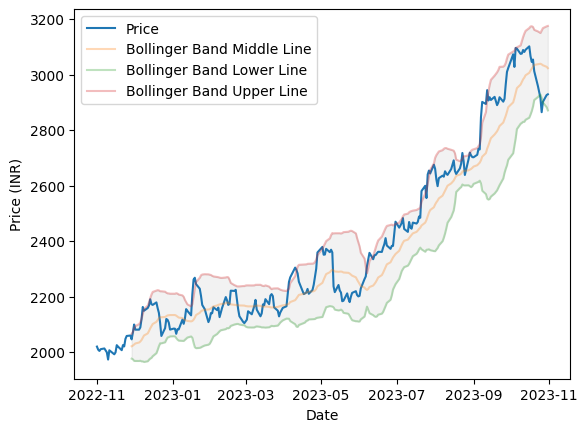

In [10]:
plt.plot(LandT['Date'], LandT['Adj Close'], label = 'Price')
plt.plot(LandT['Date'], LandT['BOLM'], label = 'Bollinger Band Middle Line', alpha = 0.3)
plt.plot(LandT['Date'], LandT['BOLD'], label = 'Bollinger Band Lower Line', alpha = 0.3)
plt.plot(LandT['Date'], LandT['BOLU'], label = 'Bollinger Band Upper Line', alpha = 0.3)
plt.fill_between(LandT['Date'], LandT['BOLU'], LandT['BOLD'], color = 'grey', alpha = 0.1)
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend(loc = 'upper left')
plt.show()

In [11]:
def add_signal_bb(df):
    # adds two columns to dataframe with buy and sell signals
    buy_list = []
    sell_list = []

    for i in range(len(df['Adj Close'])):
        if df['High'][i] > df['BOLU'][i]:
            buy_list.append(np.nan)
            sell_list.append(df['Adj Close'][i])
        elif df['Low'][i] < df['BOLD'][i]:
            buy_list.append(df['Adj Close'][i])
            sell_list.append(np.nan)
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)

    buy_list = pd.Series(buy_list, name = 'Buy')
    sell_list = pd.Series(sell_list, name = 'Sell')

    df['Buy List'] = buy_list
    df ['Sell List']= sell_list
    return df
add_signal_bb(LandT)

,Date,Open,High,Low,Close,Adj Close,Volume,TP,BOLM,Stddev,BOLU,BOLD,Buy List,Sell List
0,2022-11-01,2032.000000,2056.000000,1990.050049,2024.449951,2019.894897,4464211,2021.981649,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-11-02,2036.500000,2042.000000,2000.000000,2013.300049,2008.770142,1889651,2016.923381,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-11-03,2006.000000,2022.500000,1993.000000,2008.699951,2004.180298,1052241,2006.560099,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-11-04,2010.000000,2029.349976,2004.750000,2015.099976,2010.565918,2312753,2014.888631,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-11-07,2021.400024,2032.000000,1993.000000,2017.650024,2013.110229,1395070,2012.703410,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2023-10-25,2959.000000,2965.500000,2910.300049,2916.100098,2916.100098,2108353,2930.633382,3039.119995,55.483459,3150.086914,2928.153076,2916.100098,NaN
244,2023-10-26,2906.000000,2916.149902,2857.050049,2864.600098,2864.600098,3286109,2879.266683,3036.974162,60.817536,3158.609234,2915.339089,2864.600098,NaN
245,2023-10-27,2864.649902,2910.550049,2857.649902,2901.899902,2901.899902,2399538,2890.033285,3033.615828,66.995212,3167.606252,2899.625404,2901.899902,NaN
246,2023-10-30,2899.199951,2932.000000,2856.149902,2926.350098,2926.350098,1693052,2904.833333,3028.211662,72.855728,3173.923118,2882.500205,2926.350098,NaN


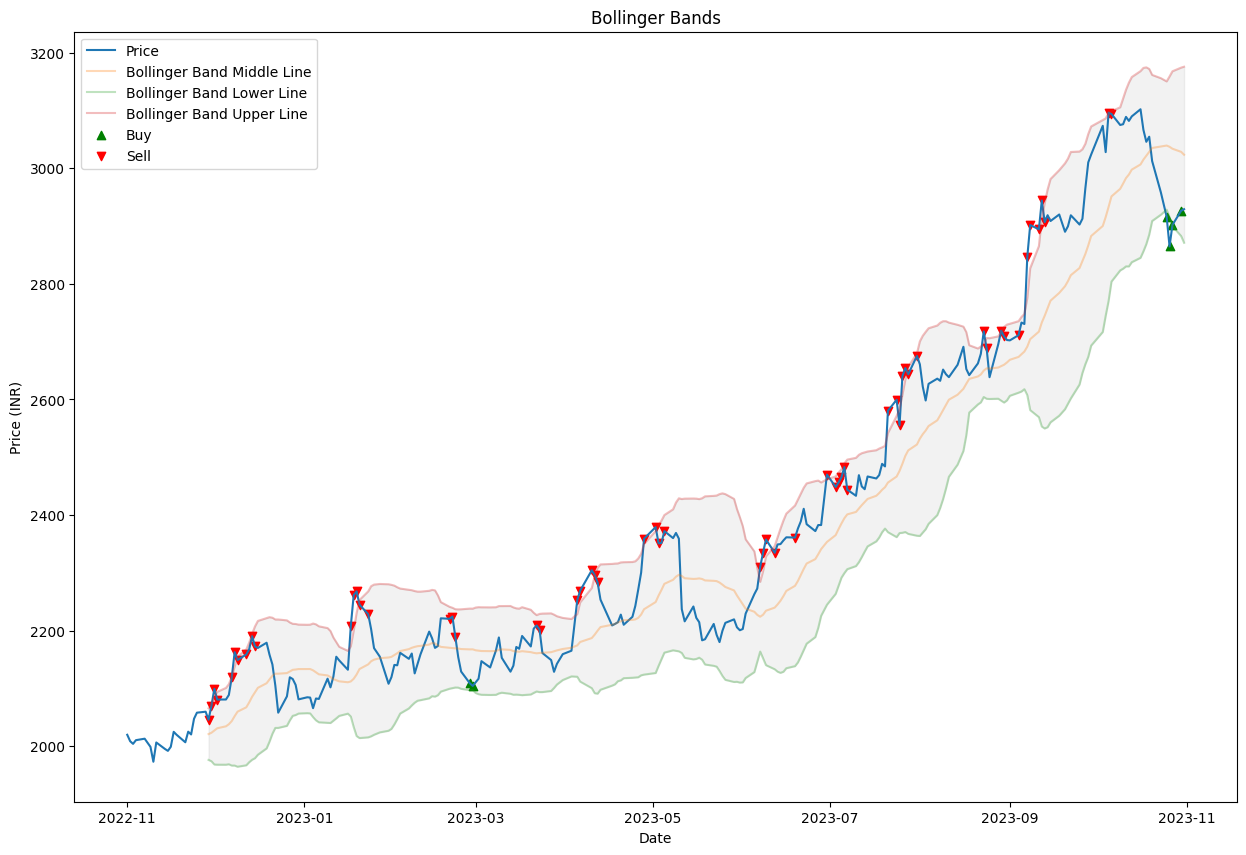

In [12]:
plt.figure(figsize = (15, 10))
plt.plot(LandT['Date'], LandT['Adj Close'], label = 'Price')
plt.plot(LandT['Date'], LandT['BOLM'], label = 'Bollinger Band Middle Line', alpha = 0.3)
plt.plot(LandT['Date'], LandT['BOLD'], label = 'Bollinger Band Lower Line', alpha = 0.3)
plt.plot(LandT['Date'], LandT['BOLU'], label = 'Bollinger Band Upper Line', alpha = 0.3)
plt.fill_between(LandT['Date'], LandT['BOLU'], LandT['BOLD'], color = 'grey', alpha = 0.1)
plt.scatter(LandT['Date'], LandT['Buy List'], label = 'Buy', marker='^', color = 'green')
plt.scatter(LandT['Date'], LandT['Sell List'], label = 'Sell', marker='v', color = 'red')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.title('Bollinger Bands')
plt.legend(loc = 'upper left')
plt.show()

In [13]:
# start of formation of keltner channels
icici = get_asset('ICICIBANK')
kcm = icici['Adj Close'].ewm(span = 20).mean()
tr = icici['High'] - icici['Low']
atr = tr.ewm(span = 20).mean()
kcu = kcm + 2 * atr
kcl = kcm - 2 * atr
icici['TR'] = tr
icici['KCM'] = kcm
icici['KCU'] = kcu
icici['KCL'] = kcl
icici

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,TR,KCM,KCU,KCL
0,2022-11-01,921.000000,921.000000,899.549988,908.599976,901.182068,9823761,21.450012,901.182068,944.082092,858.282043
1,2022-11-02,920.599976,920.750000,902.349976,904.700012,897.313965,7690974,18.400024,899.151314,938.848851,859.453777
2,2022-11-03,901.049988,913.849976,897.049988,908.650024,901.231689,9022366,16.799988,899.915215,937.373764,862.456666
3,2022-11-04,906.299988,913.400024,900.200012,905.299988,897.908997,7099336,13.200012,899.336051,933.602175,865.069927
4,2022-11-07,910.250000,920.099976,903.450012,917.500000,910.009460,11100219,16.649963,901.917858,935.950267,867.885449
...,...,...,...,...,...,...,...,...,...,...,...
243,2023-10-25,926.049988,933.799988,911.400024,916.099976,916.099976,12593434,22.399963,944.214059,970.606481,917.821637
244,2023-10-26,914.299988,916.599976,899.000000,908.650024,908.650024,21693345,17.599976,940.827008,968.058242,913.595774
245,2023-10-27,916.000000,918.150024,911.299988,912.750000,912.750000,8645505,6.850037,938.153007,964.095559,912.210455
246,2023-10-30,909.099976,926.299988,908.200012,924.900024,924.900024,7687791,18.099976,936.890818,963.810266,909.971371


In [14]:
def add_signal_kcm(df):
    # adds two columns to dataframe with buy and sell signals
    buy_list = []
    sell_list = []
    for i in range(len(df['Adj Close'])):
        if df['High'][i] > df['KCU'][i]:
            buy_list.append(np.nan)
            sell_list.append(df['Adj Close'][i])
        elif df['Low'][i] < df['KCL'][i]:
            buy_list.append(df['Adj Close'][i])
            sell_list.append(np.nan)
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)

    buy_list = pd.Series(buy_list, name = 'Buy')
    sell_list = pd.Series(sell_list, name = 'Sell')

    df['Buy List'] = buy_list
    df ['Sell List']= sell_list
    return df
add_signal_kcm(icici)

,Date,Open,High,Low,Close,Adj Close,Volume,TR,KCM,KCU,KCL,Buy List,Sell List
0,2022-11-01,921.000000,921.000000,899.549988,908.599976,901.182068,9823761,21.450012,901.182068,944.082092,858.282043,NaN,NaN
1,2022-11-02,920.599976,920.750000,902.349976,904.700012,897.313965,7690974,18.400024,899.151314,938.848851,859.453777,NaN,NaN
2,2022-11-03,901.049988,913.849976,897.049988,908.650024,901.231689,9022366,16.799988,899.915215,937.373764,862.456666,NaN,NaN
3,2022-11-04,906.299988,913.400024,900.200012,905.299988,897.908997,7099336,13.200012,899.336051,933.602175,865.069927,NaN,NaN
4,2022-11-07,910.250000,920.099976,903.450012,917.500000,910.009460,11100219,16.649963,901.917858,935.950267,867.885449,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2023-10-25,926.049988,933.799988,911.400024,916.099976,916.099976,12593434,22.399963,944.214059,970.606481,917.821637,916.099976,NaN
244,2023-10-26,914.299988,916.599976,899.000000,908.650024,908.650024,21693345,17.599976,940.827008,968.058242,913.595774,908.650024,NaN
245,2023-10-27,916.000000,918.150024,911.299988,912.750000,912.750000,8645505,6.850037,938.153007,964.095559,912.210455,912.750000,NaN
246,2023-10-30,909.099976,926.299988,908.200012,924.900024,924.900024,7687791,18.099976,936.890818,963.810266,909.971371,924.900024,NaN


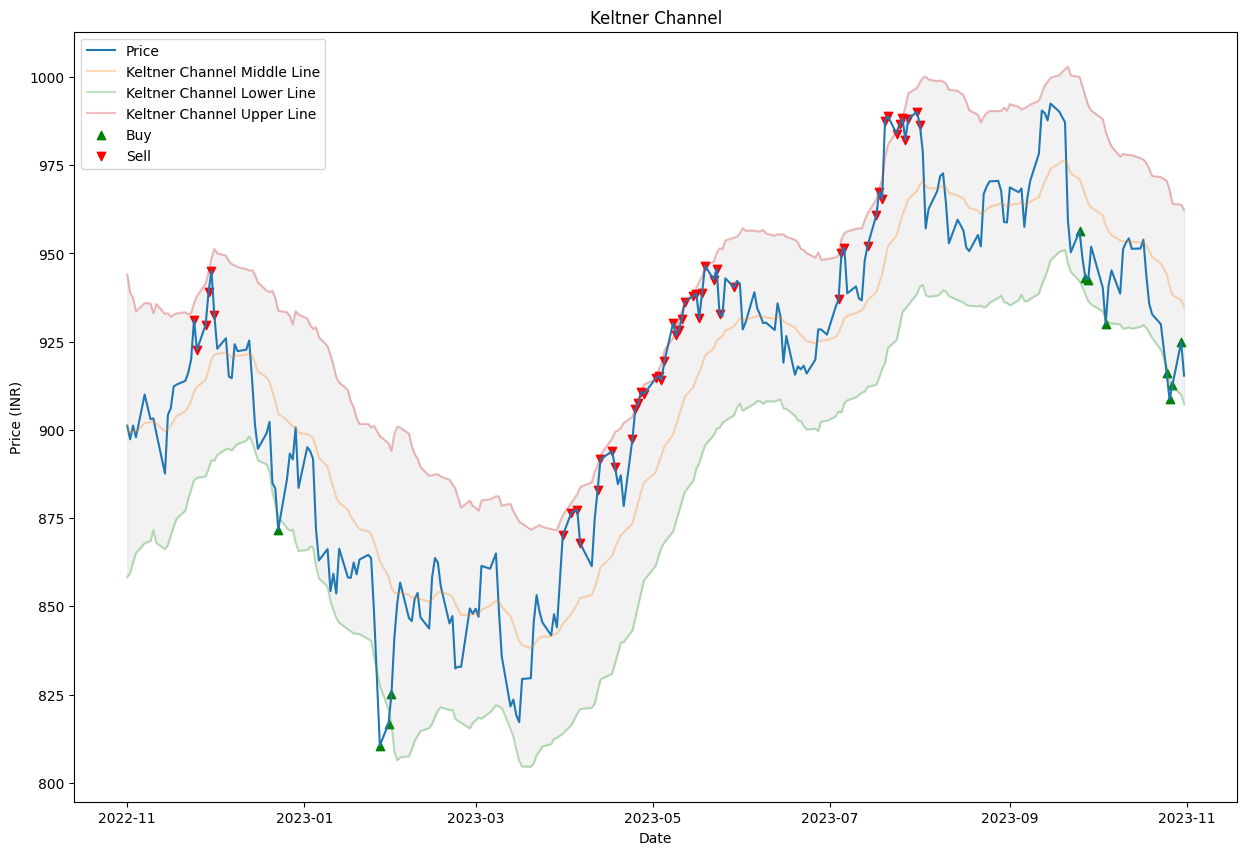

In [15]:
plt.figure(figsize = (15, 10))
plt.plot(icici['Date'], icici['Adj Close'], label = 'Price')
plt.plot(icici['Date'], icici['KCM'], label = 'Keltner Channel Middle Line', alpha = 0.3)
plt.plot(icici['Date'], icici['KCL'], label = 'Keltner Channel Lower Line', alpha = 0.3)
plt.plot(icici['Date'], icici['KCU'], label = 'Keltner Channel Upper Line', alpha = 0.3)
plt.fill_between(icici['Date'], icici['KCU'], icici['KCL'], color = 'grey', alpha = 0.1)
plt.scatter(icici['Date'], icici['Buy List'], label = 'Buy', marker='^', color = 'green')
plt.scatter(icici['Date'], icici['Sell List'], label = 'Sell', marker='v', color = 'red')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.title('Keltner Channel')
plt.legend(loc = 'upper left')
plt.show()